In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data
Explore dataset

In [2]:
df = pd.read_csv('adult.csv', na_values='?')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.nunique()

age                   74
workclass              8
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        41
income                 2
dtype: int64

In [6]:
obj_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(include='int64').columns

In [7]:
df[num_col].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
more_than_50k = df[df['income'] == '>50K']
less_than_50k = df[df['income'] == '<=50K']

In [9]:
# proportion of surveyers earning more than $50K annual salary
print('proportion of surveyers earning > 50K:', round(len(more_than_50k) / len(df['income']), 3) * 100,'%')
print('proportion of surveyers earning <= 50K:', round(len(less_than_50k) / len(df['income']), 3) * 100,'%')

proportion of surveyers earning > 50K: 23.9 %
proportion of surveyers earning <= 50K: 76.1 %


## Missing values
Find suspicious entries and impute/remove them from dataset

In [10]:
# count missing values
missing_values = pd.concat([df.isnull().sum(), df.isnull().mean()*100], axis=1)
missing_values.columns = ['counts', 'missing %']
missing_values.sort_values(by='missing %', ascending=False)

,counts,missing %
occupation,2809,5.751198
workclass,2799,5.730724
native-country,857,1.754637
age,0,0.000000
fnlwgt,0,0.000000
education,0,0.000000
educational-num,0,0.000000
marital-status,0,0.000000
relationship,0,0.000000
race,0,0.000000


Most features have 0 missing values. The two columns with highest missing values only accumulate less than 6% of the total values. It is acceptable and the rest will be used for exploratory data analysis.

## Visualization

In [11]:
for each_occupation in df['occupation'].unique():
    print(each_occupation)

Machine-op-inspct
Farming-fishing
Protective-serv
nan
Other-service
Prof-specialty
Craft-repair
Adm-clerical
Exec-managerial
Tech-support
Sales
Priv-house-serv
Transport-moving
Handlers-cleaners
Armed-Forces


In [12]:
df[(df['income'] == '>50K') & (df['occupation'] == 'Machine-op-inspct')].count()

age                372
workclass          372
fnlwgt             372
education          372
educational-num    372
marital-status     372
occupation         372
relationship       372
race               372
gender             372
capital-gain       372
capital-loss       372
hours-per-week     372
native-country     365
income             372
dtype: int64

### Gender, race, and working hours

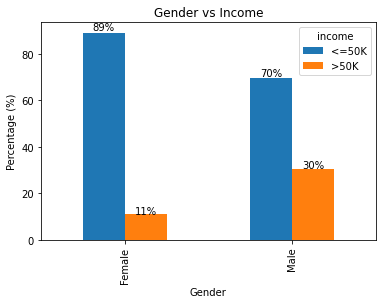

In [13]:
gender_income = pd.crosstab(df['gender'], df['income']).apply(lambda x: x/x.sum()*100, axis=1)
ax = gender_income.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.title('Gender vs Income')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/100:0.0%}', (x + width/2, y + height*1.01), ha='center')

In general, 90% of the female, while only 70% of male, earned below $50K annual salary. Why is that? Does sex discrimination truly exist?

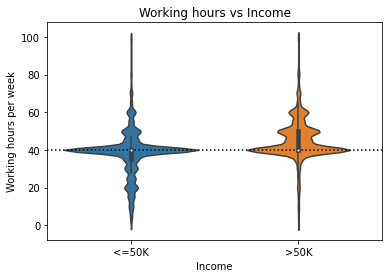

In [14]:
sns.violinplot(x='income', y='hours-per-week', data=df, alpha=0.2)
plt.axhline(y=40, color='black', linestyle='dotted')
plt.xlabel('Income')
plt.ylabel('Working hours per week')
plt.title('Working hours vs Income');

Let's have a general idea first. We should agree that people working more hours tend to earn more.

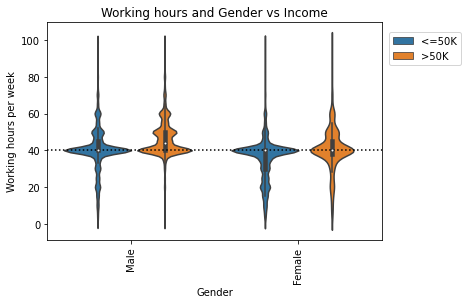

In [15]:
sns.violinplot(x='gender', y='hours-per-week', data=df, hue='income', alpha=0.2)
plt.axhline(y=40, color='black', linestyle='dotted')
plt.legend(bbox_to_anchor=(1.25,0.98))
plt.xticks(rotation=90)
plt.xlabel('Gender')
plt.ylabel('Working hours per week')
plt.title('Working hours and Gender vs Income');

We can tell that people who earn more than $50K tend to work longer hours, with an exception of male who work more than 40 hours but earn less.

But at least this graph tells us the reason that female earning less may be due to less working hours rather than sex discrimination.

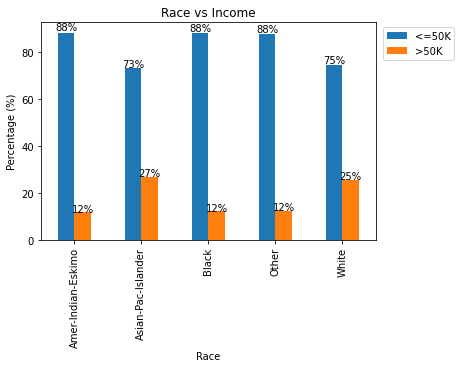

In [16]:
cat_order = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
race_income = pd.crosstab(df['race'], df['income']).apply(lambda x: x/x.sum()*100, axis=1)
ax = race_income.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.25,1))
plt.xlabel('Race')
plt.ylabel('Percentage (%)')
plt.title('Race vs Income')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/100:0.0%}', (x + width/2, y + height*1.01), ha='center')

From the above graph, White and Asian-Pacific-Islander people tend to earn more than $50K a year. We will explore in further below.

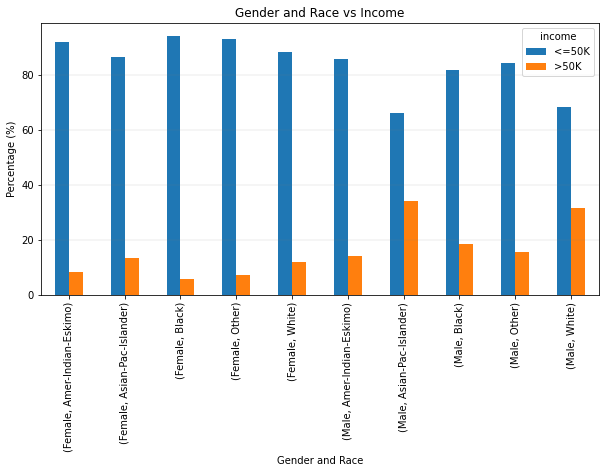

In [17]:
gender_race_income = pd.crosstab([df['gender'], df['race']], df['income']).apply(lambda x: x/x.sum()*100, axis=1)
gender_race_income.plot(kind='bar', figsize=(10,5))
plt.xlabel('Gender and Race')
plt.ylabel('Percentage (%)')
plt.title('Gender and Race vs Income')

plt.axhline(y=20, color='grey', alpha=0.1, fillstyle='bottom')
plt.axhline(y=40, color='grey', alpha=0.1, fillstyle='bottom')
plt.axhline(y=60, color='grey', alpha=0.1, fillstyle='bottom')
plt.axhline(y=80, color='grey', alpha=0.1, fillstyle='bottom');

It seems to be particularly true for White male and Asian male who have a significantly higher probability of earning more than $50K compared to their female races. We can also tell that Black male tends to earn a lot more than Black female, which drags down the probabilty of earning in the upper end for the Black race. Male earns more due to higher working hours has been explained in the second graph from above. But does the phenomenon differ from race to race?

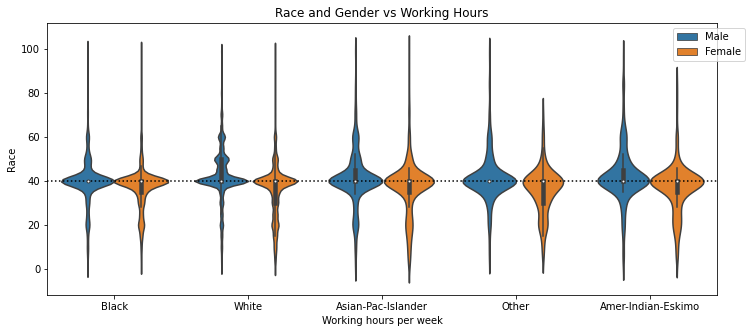

In [18]:
plt.figure(figsize=(12,5))
sns.violinplot(x='race', y='hours-per-week', data=df, hue='gender', alpha=0.2)
plt.axhline(y=40, color='black', linestyle='dotted')
plt.legend(bbox_to_anchor=(1.05,1))
plt.xlabel('Working hours per week')
plt.ylabel('Race')
plt.title('Race and Gender vs Working Hours');

From the above graph, we can tell majority of male works longer hours than majority of female. This is true across 3 races, White, Asian-Pacific-Islander, and American-Indian-Eskimo. This leads to a clearer picture of why White and Asian male earn more than their female race and also more than the other races in general.

However, it is also true that American-Indian-Eskimo male may be underpaid. For the long working hours they provide, they should have similar probability of earning above $50K. But instead, they have the lowest probability of earning in the upper end across all races.

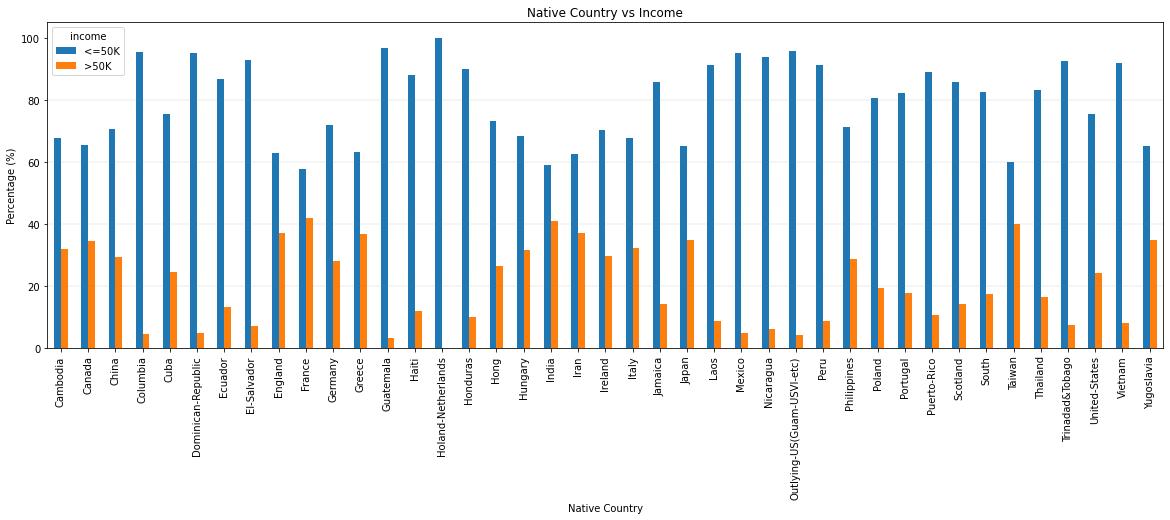

In [19]:
country_income = pd.crosstab(df['native-country'], df['income']).apply(lambda x: x/x.sum()*100, axis=1)
ax = country_income.plot(kind='bar', figsize=(20,6))
plt.xlabel('Native Country')
plt.ylabel('Percentage (%)')
plt.title('Native Country vs Income')

plt.axhline(y=20, color='grey', alpha=0.1, fillstyle='bottom')
plt.axhline(y=40, color='grey', alpha=0.1, fillstyle='bottom')
plt.axhline(y=60, color='grey', alpha=0.1, fillstyle='bottom')
plt.axhline(y=80, color='grey', alpha=0.1, fillstyle='bottom');

People from France, India, or Taiwan tend to have a higher probability (~40%) of earning above $50K, highest among all native countries.